# Clasificación de Supernovas usando Random Forest
## usando los datos del extraidos del notebook SN_feature_extraction V2

In [86]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time
inicio_ejecucion = time.time()

In [87]:
import pandas as pd
url_features_clean_unbalanced='https://raw.githubusercontent.com/joaquinzepeda/Datos/main/datos%20supernovas/features_clean_unbalanced.csv'
features_clean_unbalanced = pd.read_csv(url_features_clean_unbalanced, index_col=None)
features_clean_unbalanced

,delta_mag_fid_1,positive_fraction_1,delta_mag_fid_2,positive_fraction_2,Multiband_period,PPE,Period_band_1,delta_period_1,Period_band_2,delta_period_2,...,SPM_tau_fall_1_y.1,SPM_chi_1_y.1,SPM_A_2_y.1,SPM_t0_2_y.1,SPM_gamma_2_y.1,SPM_beta_2_y.1,SPM_tau_rise_2_y.1,SPM_tau_fall_2_y.1,SPM_chi_2_y.1,classALeRCE
0,2.244800,1.0,1.847730,1.0,51.630429,0.018797,0.200240,51.430189,0.069774,51.560655,...,11.688865,0.007554,0.311686,6.958040,21.231911,0.416776,3.677212,30.091547,0.594410,SNIa
1,0.495977,1.0,0.786995,1.0,0.156563,0.004384,0.165508,0.008945,0.185710,0.029147,...,24.821418,0.033287,0.114158,-5.114811,13.845734,0.063725,10.514372,20.820992,0.044529,SNIbc
2,3.293953,1.0,2.170098,1.0,1.005344,0.056146,0.065053,0.940291,999.999953,998.994608,...,22.204705,0.010855,2.067952,-22.606529,39.255637,0.755130,17.087419,46.760685,1.111489,SNIIn
3,1.371363,1.0,0.797367,1.0,1.028361,0.034738,1.029866,0.001505,37.037036,36.008675,...,14.225585,0.028317,0.257985,4.309858,18.030784,0.606824,3.959666,85.046677,0.027387,SNIa
4,0.728745,1.0,1.682007,1.0,0.117252,0.008665,0.159770,0.042518,0.183438,0.066186,...,21.426885,0.123988,0.456477,-10.767997,44.214095,0.483826,25.675861,25.166046,17.122697,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,2.981503,1.0,2.216758,1.0,104.972373,0.126945,90.909084,14.063289,142.857138,37.884766,...,24.208459,0.077253,0.287074,4.316309,14.243013,0.570416,4.845103,28.891700,0.040567,SNIa
1600,2.669654,1.0,1.719614,1.0,73.929961,0.074820,66.666664,7.263297,76.923075,2.993114,...,10.058062,0.013802,0.245710,12.105234,2.379414,0.340936,6.101452,14.828348,0.039756,SNIa
1601,1.627867,1.0,1.534458,1.0,1.016858,0.042308,999.999953,998.983094,999.999953,998.983094,...,19.974884,0.045213,0.401462,5.696664,35.855792,0.521981,3.882842,30.064385,0.056440,SNIa
1602,1.344170,1.0,2.227105,1.0,1.024148,0.016782,999.999953,998.975804,999.999953,998.975804,...,4.324015,1.353607,0.145629,4.926030,8.235378,0.014030,2.534057,19.834071,0.047055,SNIa


In [88]:
count_clase1 = pd.DataFrame({'classALeRCE':features_clean_unbalanced['classALeRCE']})
count_clase1.groupby(count_clase1.columns.tolist(),as_index=False).size()

,classALeRCE,size
0,SLSN,33
1,SNII,280
2,SNIIb,11
3,SNIIn,38
4,SNIa,1166
5,SNIbc,76


# Unión de las supernovas clase II
## Se unen las clases SNII,SNIIb,SNIIn	

In [89]:
features_clean_unbalanced['classALeRCE']= features_clean_unbalanced['classALeRCE'].replace(['SNIIb','SNIIn'],'SNII')
features_clean_unbalanced

,delta_mag_fid_1,positive_fraction_1,delta_mag_fid_2,positive_fraction_2,Multiband_period,PPE,Period_band_1,delta_period_1,Period_band_2,delta_period_2,...,SPM_tau_fall_1_y.1,SPM_chi_1_y.1,SPM_A_2_y.1,SPM_t0_2_y.1,SPM_gamma_2_y.1,SPM_beta_2_y.1,SPM_tau_rise_2_y.1,SPM_tau_fall_2_y.1,SPM_chi_2_y.1,classALeRCE
0,2.244800,1.0,1.847730,1.0,51.630429,0.018797,0.200240,51.430189,0.069774,51.560655,...,11.688865,0.007554,0.311686,6.958040,21.231911,0.416776,3.677212,30.091547,0.594410,SNIa
1,0.495977,1.0,0.786995,1.0,0.156563,0.004384,0.165508,0.008945,0.185710,0.029147,...,24.821418,0.033287,0.114158,-5.114811,13.845734,0.063725,10.514372,20.820992,0.044529,SNIbc
2,3.293953,1.0,2.170098,1.0,1.005344,0.056146,0.065053,0.940291,999.999953,998.994608,...,22.204705,0.010855,2.067952,-22.606529,39.255637,0.755130,17.087419,46.760685,1.111489,SNII
3,1.371363,1.0,0.797367,1.0,1.028361,0.034738,1.029866,0.001505,37.037036,36.008675,...,14.225585,0.028317,0.257985,4.309858,18.030784,0.606824,3.959666,85.046677,0.027387,SNIa
4,0.728745,1.0,1.682007,1.0,0.117252,0.008665,0.159770,0.042518,0.183438,0.066186,...,21.426885,0.123988,0.456477,-10.767997,44.214095,0.483826,25.675861,25.166046,17.122697,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,2.981503,1.0,2.216758,1.0,104.972373,0.126945,90.909084,14.063289,142.857138,37.884766,...,24.208459,0.077253,0.287074,4.316309,14.243013,0.570416,4.845103,28.891700,0.040567,SNIa
1600,2.669654,1.0,1.719614,1.0,73.929961,0.074820,66.666664,7.263297,76.923075,2.993114,...,10.058062,0.013802,0.245710,12.105234,2.379414,0.340936,6.101452,14.828348,0.039756,SNIa
1601,1.627867,1.0,1.534458,1.0,1.016858,0.042308,999.999953,998.983094,999.999953,998.983094,...,19.974884,0.045213,0.401462,5.696664,35.855792,0.521981,3.882842,30.064385,0.056440,SNIa
1602,1.344170,1.0,2.227105,1.0,1.024148,0.016782,999.999953,998.975804,999.999953,998.975804,...,4.324015,1.353607,0.145629,4.926030,8.235378,0.014030,2.534057,19.834071,0.047055,SNIa


In [90]:
count_clase2 = pd.DataFrame({'classALeRCE':features_clean_unbalanced['classALeRCE']})
count_clase2 = count_clase1.groupby(count_clase2.columns.tolist(),as_index=False).size()
count_clase2

,classALeRCE,size
0,SLSN,33
1,SNII,280
2,SNIIb,11
3,SNIIn,38
4,SNIa,1166
5,SNIbc,76



# Separación del conjunto en ENTRENAMIENTO y TEST:

Dividiremos el conjunto en 70% para entrenamiento y 30% para test


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # se codifica la clase
le = LabelEncoder()


X, y = features_clean_unbalanced.iloc[:,:-1], features_clean_unbalanced['classALeRCE']
# label encode the target variable
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
classifier_0 = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=30,
    max_features='sqrt',
    n_jobs=-1,
    class_weight='balanced'
)
classifier_0.fit(X_train,y_train)

#------------------SE PRUEBA EL CLASIFICADOR----------------------------------
# predict new data:
#pues solo usaremos el target para comprobar la eficacia de la predicción

pred_labels_0 = classifier_0.predict(X_test)

In [97]:
# calculate accuracy
from sklearn import metrics
accuracy_0= metrics.accuracy_score(y_test, pred_labels_0)*100
presicion_0 = metrics.precision_score(y_test, pred_labels_0,average='macro')*100
recall_0 = metrics.recall_score(y_test, pred_labels_0,average='macro')*100
print("Classification accuracy is %2f"%accuracy_0,"%")
print("Classification precision is %2f"%presicion_0,"%")
print("Classification recall is %2f"%recall_0,"%")

Classification accuracy is 86.034913 %
Classification precision is 91.918030 %
Classification recall is 48.096886 %


In [98]:
y_sin_codificar = le.inverse_transform(y)
np.unique(y),np.unique(y_sin_codificar)
df = pd.DataFrame()
df['ClassALeRCE']=np.unique(y_sin_codificar)
df['Codificación']=np.unique(y)
df

,ClassALeRCE,Codificación
0,SLSN,0
1,SNII,1
2,SNIa,2
3,SNIbc,3


In [99]:
count_clase3 = pd.DataFrame({'y_train':y_train})
count_clase3 = count_clase3.groupby(count_clase3.columns.tolist(),as_index=False).size()
count_clase3 

,y_train,size
0,0,23
1,1,244
2,2,877
3,3,59


In [100]:
count_clase3['size'][0],count_clase3['size'][1],count_clase3['size'][2],count_clase3['size'][3]


(23, 244, 877, 59)

# Balancear los datos: Oversampling the minority class
Ojo que solo balanceamos los datos de Train

In [101]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder # se codifica la clase

le = LabelEncoder()

# transform the dataset
# clase 0 : SLSN, clase 1: SNII, clase 2: SNIa,clase 3 = SNIbc
oversample = SMOTE(sampling_strategy = {0: count_clase3['size'][0]*10, 1: count_clase3['size'][1]*2, 2: count_clase3['size'][2]*1, 3: count_clase3['size'][3]*5})
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [102]:
count_clase5 = pd.DataFrame({'classALeRCE': y_train_smote})
count_clase5.groupby(count_clase5.columns.tolist(),as_index=False).size()

,classALeRCE,size
0,0,230
1,1,488
2,2,877
3,3,295


In [103]:
classifier = RandomForestClassifier()
#-----------------------ENTRENAMIENTO-----------------------------------------
classifier.fit(X_train_smote,y_train_smote)

#------------------SE PRUEBA EL CLASIFICADOR----------------------------------
# predict new data:
#pues solo usaremos el target para comprobar la eficacia de la predicción

pred_labels = classifier.predict(X_test)

In [105]:
# calculate accuracy
from sklearn import metrics
accuracy= metrics.accuracy_score(y_test, pred_labels)*100
presicion= metrics.precision_score(y_test, pred_labels,average='macro')*100
recall = metrics.recall_score(y_test, pred_labels,average='macro')*100
print("Classification accuracy is %2f"%accuracy,"%")
print("Classification precision is %2f"%presicion,"%")
print("Classification recall is %2f"%recall,"%")

Classification accuracy is 87.281796 %
Classification precision is 73.155916 %
Classification recall is 52.958478 %


Text(607.4818181818181, 0.5, 'True Label')

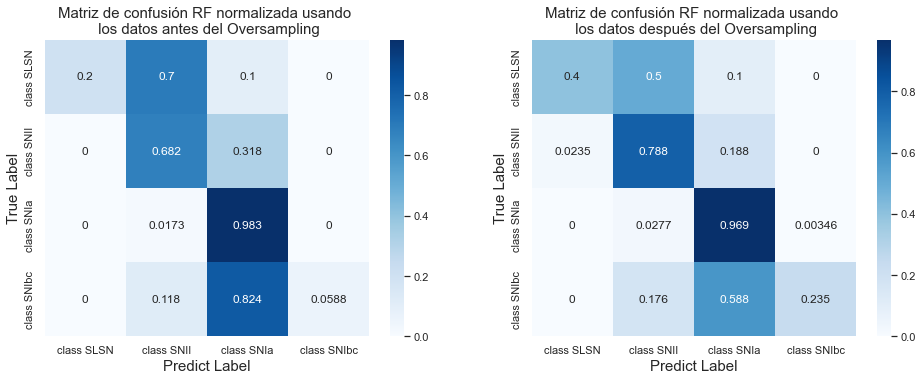

In [171]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

columns = ['class %s' %(i) for i in np.unique(y_sin_codificar)]


fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(2, 2, 1)

confm_1 = confusion_matrix(y_test, pred_labels_0,normalize='true')
df_cm_1 = pd.DataFrame(confm_1, index=columns, columns=columns)
ax_1 = sn.heatmap(df_cm_1, cmap='Blues',fmt='.3g', ax=ax, annot=True)
#sn.set(rc={'figure.figsize':(16,12)})
ax_1.set_title('Matriz de confusión RF normalizada usando \n los datos antes del Oversampling',fontsize=15)
ax_1.set_xlabel('Predict Label',fontsize=15)
ax_1.set_ylabel('True Label',fontsize=15)

ax = fig.add_subplot(2, 2, 2)
confm_2 = confusion_matrix(y_test, pred_labels,normalize='true')
df_cm_2 = pd.DataFrame(confm_2, index=columns, columns=columns)
ax_2 = sn.heatmap(df_cm_2, cmap='Blues',fmt='.3g',ax=ax, annot=True)
#sn.set(rc={'figure.figsize':(16,12)})
ax_2.set_title('Matriz de confusión RF normalizada usando \n los datos después del Oversampling',fontsize=15)
ax_2.set_xlabel('Predict Label',fontsize=15)
ax_2.set_ylabel('True Label',fontsize=15)

In [67]:
fin = time.time()

In [110]:
tiempo_de_extraccion = (fin-inicio_ejecucion)/60
print(f'La clasificación se demoro {"{:.2f}".format(tiempo_de_extraccion)} minutos')

## Random Forest Hyperparameter tuning

In [35]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(20,300,10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [36]:
"""
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = None)
# Fit the random search model
rf_random.fit(X_train_smote, y_train_smote)
"""

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END bootstrap=False, max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=19, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   1.4s
[CV] END bootstrap=True, max_depth=19, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   1.8s
[CV] END bootstrap=True, max_depth=19, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   1.4s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=160; 

[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=210; total time=   1.4s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=210; total time=   1.4s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=210; total time=   1.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, m

[CV] END bootstrap=True, max_depth=37, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   1.6s
[CV] END bootstrap=True, max_depth=37, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   1.6s
[CV] END bootstrap=False, max_depth=37, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.6s
[CV] END bootstrap=False, max_depth=37, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.7s
[CV] END bootstrap=False, max_depth=37, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.7s
[CV] END bootstrap=True, max_depth=28, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.6s
[CV] END bootstrap=True, max_depth=28, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.6s
[CV] END bootstrap=True, max_depth=28, max_feature

[CV] END bootstrap=False, max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=90; total time=   0.7s
[CV] END bootstrap=False, max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=90; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=210; total time=   1.8s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=210; total time=   1.8s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=210; total time=   1.9s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=280; total time=   1.6s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=280; total time=   1.6s
[CV] END bootstrap=True, max_depth=100, m

[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   1.4s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=210; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=210; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=210; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=230; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=230; total time=   1.3s
[CV] END bootstrap=True, max_depth=1

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 30, 40, 50, 60, 70,
                                                         80, 90, 100, 110, 120,
                                                         130, 140, 150, 160,
                                                         170, 180, 190, 200,
                                                         210, 220, 230, 240,
                                   

In [37]:
"""
{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': False}
"""
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': False}

In [38]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 50, 90, 100],
    'max_features': [2, 3,5,10,15,20,25,30],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [30,50,60,100, 200, 300]
}
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs=None, verbose = 2)

In [40]:
"""
# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)
grid_search.best_params_
"""

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bo

[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_lea

[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_le

[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_sample

[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_sample

[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_

[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_sampl

[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, 

[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_sa

[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_sa

[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, max_features=10,

[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_s

[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=30, max_features=15, m

[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   1.9s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   2.0s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   2.0s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_sam

[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_sample

[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   2.7s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   2.8s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   2.7s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_sa

[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_s

[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.1s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.2s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.2s
[CV] END bootstrap=True, max_depth=30, max_features=25,

[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_sa

[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   2.7s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   3.9s
[CV] END bootstrap=True, max_depth=30, max_features=30,

[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   3.8s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples

[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_lea

[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_le

[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_sample

[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_sample

[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_

[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_sampl

[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=4, 

[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_le

[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_sa

[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END bootstrap=True, max_depth=50, max_features=10,

[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_s

[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=50, max_features=15, m

[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   2.0s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   2.0s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_sam

[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_sample

[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   2.6s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   2.6s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   2.7s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_sa

[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_s

[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   3.4s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   3.3s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   3.2s
[CV] END bootstrap=True, max_depth=50, max_features=25,

[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_sa

[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   3.0s
[CV] END bootstrap=True, max_depth=50, max_features=25,

[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   4.0s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples

[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   2.7s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samp

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_le

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_sample

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_sample

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_sampl

[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, 

[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_le

[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_le

[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END bootstrap=True, max_depth=90, max_features=10,

[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.6s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_s

[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=10, m

[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   2.0s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_sample

[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   2.7s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   2.7s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   2.8s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_sa

[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_s

[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   2.4s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   2.5s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   2.5s
[CV] END bootstrap=True, max_depth=90, max_features=20,

[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_sa

[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   3.2s
[CV] END bootstrap=True, max_depth=90, max_features=25,

[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   3.0s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples

[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samp

[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   4.1s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   3.6s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   3.6s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_sa

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, mi

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, mi

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, m

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_l

[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_sa

[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_sa

[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=5,

[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=1

[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_feature

[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   1.4s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   1.4s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   1.4s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features

[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_s

[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   2.0s
[CV] END bootstrap=True, max_depth=100, max_features=15

[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   2.7s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   2.7s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=20

[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features

[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   2.5s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   2.5s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   2.5s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_featu

[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=25

[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=100, max_featu

[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   3.1s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   3.2s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   3.0s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=30,

[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=100, max_features=30, min

[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   3.6s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   3.6s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   3.8s
[CV] END bootstrap=True, max_depth=100, max_features=30

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

# Pruebas con los mejores hiperparametros encontrados

In [41]:

"""
best_grid = grid_search.best_estimator_
best_grid
"""

RandomForestClassifier(max_depth=100, max_features=15, min_samples_leaf=3,
                       min_samples_split=8)

## Mejor usando grid search

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [116]:
#    class_weight='balanced'
best_classifier_1 = RandomForestClassifier(
    n_estimators=300,
    max_depth=100,
    max_features= 15,
    min_samples_leaf=3,
    min_samples_split= 8,
    bootstrap=True
)
best_classifier_1.fit(X_train_smote,y_train_smote)
#------------------SE PRUEBA EL CLASIFICADOR----------------------------------
# predict new data:
#pues solo usaremos el target para comprobar la eficacia de la predicción

pred_labels_1 = best_classifier_1.predict(X_test)


In [107]:
# calculate accuracy
from sklearn import metrics
accuracy_1 = metrics.accuracy_score(y_test, pred_labels_1)*100
presicion_1 = metrics.precision_score(y_test, pred_labels_1,average='macro')*100
recall_1 = metrics.recall_score(y_test, pred_labels_1,average='macro')*100
print("Classification accuracy is %2f"%accuracy_1,"%")
print("Classification precision is %2f"%presicion_1,"%")
print("Classification recall is %2f"%recall_1,"%")

Classification accuracy is 88.029925 %
Classification precision is 76.122334 %
Classification recall is 59.221453 %


## Classification accuracy is 87.53%

Text(607.4818181818181, 0.5, 'True Label')

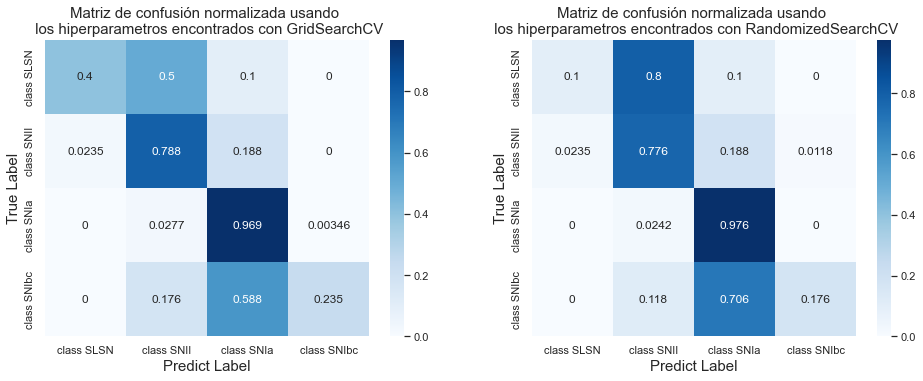

In [168]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

columns = ['class %s' %(i) for i in np.unique(y_sin_codificar)]


fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(2, 2, 1)

confm_1 = confusion_matrix(y_test, pred_labels_1,normalize='true')
df_cm_1 = pd.DataFrame(confm_1, index=columns, columns=columns)
ax_1 = sn.heatmap(df_cm_1, cmap='Blues',fmt='.3g', ax=ax, annot=True)
#sn.set(rc={'figure.figsize':(16,12)})
ax_1.set_title('Matriz de confusión normalizada usando \n los hiperparametros encontrados con GridSearchCV',fontsize=15)
ax_1.set_xlabel('Predict Label',fontsize=15)
ax_1.set_ylabel('True Label',fontsize=15)

ax = fig.add_subplot(2, 2, 2)
confm_2 = confusion_matrix(y_test, pred_labels_2,normalize='true')
df_cm_2 = pd.DataFrame(confm_2, index=columns, columns=columns)
ax_2 = sn.heatmap(df_cm_2, cmap='Blues',fmt='.3g',ax=ax, annot=True)
#sn.set(rc={'figure.figsize':(16,12)})
ax_2.set_title('Matriz de confusión normalizada usando \n los hiperparametros encontrados con RandomizedSearchCV',fontsize=15)
ax_2.set_xlabel('Predict Label',fontsize=15)
ax_2.set_ylabel('True Label',fontsize=15)

## Mejor usando RandomizedSearchCV

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': False}

In [172]:
#    class_weight='balanced'
best_classifier_2 = RandomForestClassifier(
    n_estimators=100,
    max_depth=100,
    max_features= 'auto',
    min_samples_leaf=1,
    min_samples_split= 2,
    bootstrap=False
)
best_classifier_2.fit(X_train_smote,y_train_smote)

#------------------SE PRUEBA EL CLASIFICADOR----------------------------------
# predict new data:
#pues solo usaremos el target para comprobar la eficacia de la predicción

pred_labels_2 = best_classifier_2.predict(X_test)

In [173]:
# calculate accuracy
from sklearn import metrics
accuracy_2 = metrics.accuracy_score(y_test, pred_labels_2)*100
presicion_2 = metrics.precision_score(y_test, pred_labels_2,average='macro')*100
recall_2 = metrics.recall_score(y_test, pred_labels_2,average='macro')*100
print("Classification accuracy is %2f"%accuracy_2,"%")
print("Classification precision is %2f"%presicion_2,"%")
print("Classification recall is %2f"%recall_2,"%")

Classification accuracy is 87.531172 %
Classification precision is 76.026786 %
Classification recall is 51.453287 %


In [175]:
if accuracy_2>accuracy_1:
    print("El mejor modelo es el que utiliza los hiperparametros encontrandos usando RandomizedSearchCV")
    print("""{'n_estimators': 100,\n 'min_samples_split': 2,\n 'min_samples_leaf': 1,\n 'max_features': 'auto',\n 'max_depth': 100,\n 'bootstrap': False}""")
    best_classifier = best_classifier_2
    pred_labels=pred_labels_2
else:
    print("El mejor modelo es el que utiliza los hiperparametros encontrandos usando GridSearch")
    print("""{'bootstrap': True,
 'max_depth': 100,
 'max_features': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}""")
    best_classifier = best_classifier_1
    pred_labels=pred_labels_1

El mejor modelo es el que utiliza los hiperparametros encontrandos usando GridSearch
{'bootstrap': True,
 'max_depth': 100,
 'max_features': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}


## Classification accuracy is 88.52%

Text(120.5, 0.5, 'True Label')

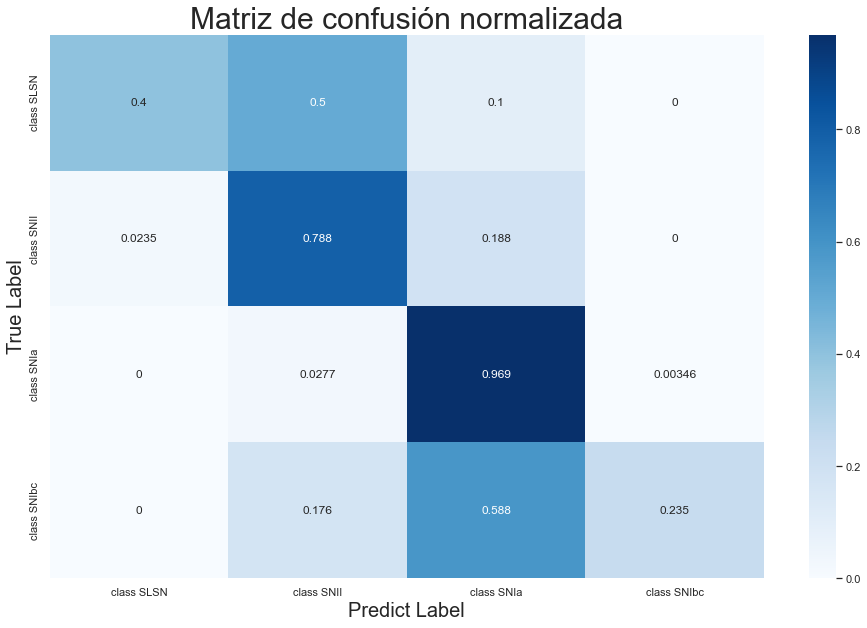

In [179]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

columns = ['class %s' %(i) for i in np.unique(y_sin_codificar)]

confm = confusion_matrix(y_test, pred_labels,normalize='true')
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues',fmt='.3g', annot=True)
sn.set(rc={'figure.figsize':(12,8)})
ax.set_title('Matriz de confusión normalizada',fontsize=30)
ax.set_xlabel('Predict Label',fontsize=20)
ax.set_ylabel('True Label',fontsize=20)

# Importancia de las caracteristicas

In [72]:
import matplotlib.pyplot as plt
importance = best_classifier.feature_importances_

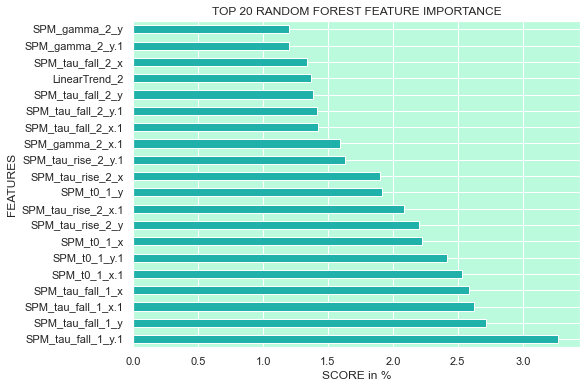

In [73]:
ranking = 20

#plot graph of feature importances for better visualization
fig, ax = plt.subplots(1,figsize=(8, 6))

feat_importances = pd.Series(importance*100, index=features_clean_unbalanced.columns[0:-1])
feat_importances.nlargest(ranking).plot(kind='barh', color='lightseagreen')
title = f"TOP {ranking} RANDOM FOREST FEATURE IMPORTANCE"
plt.title(title)
plt.xlabel("SCORE in %")
plt.ylabel("FEATURES")
ax.set_facecolor('#bbfadc')
plt.show()

## Con el siguiente codigo se puede guardar el mejor modelo para utilizarlo en otra ocasión

In [77]:
import pickle
# save the model to disk
filename = 'best_classifier_RF_2.sav'
pickle.dump(best_classifier, open(filename, 'wb'))

In [78]:
 # load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8802992518703242


# El mejor modelo guardado hasta ahora: 

In [180]:
 # load the model from disk
best_classifier_RF = pickle.load(open('best_classifier_RF.sav', 'rb'))
result = best_classifier_RF.score(X_test, y_test)
print(result)

0.885286783042394


In [181]:
best_pred_labels = best_classifier_RF.predict(X_test)

Text(84.5, 0.5, 'True Label')

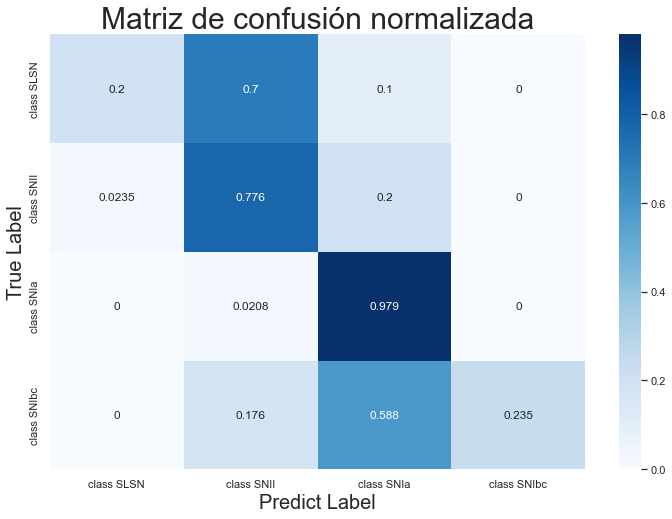

In [182]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

columns = ['class %s' %(i) for i in np.unique(y_sin_codificar)]

confm = confusion_matrix(y_test, best_pred_labels,normalize='true')
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues',fmt='.3g', annot=True)
sn.set(rc={'figure.figsize':(12,8)})
ax.set_title('Matriz de confusión normalizada',fontsize=30)
ax.set_xlabel('Predict Label',fontsize=20)
ax.set_ylabel('True Label',fontsize=20)